# NLP Basics: Vectorize Text Using TF-IDF

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

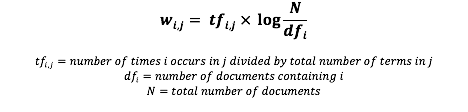

### Read In Text

In [1]:
# Read in raw data and clean up the column names
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('../../../data/spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Create Function To Clean Text

In [2]:
# Define a function to handle all data cleaning
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [3]:
# Fit a basic TFIDF Vectorizer and view the results
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

In [5]:
X_tfidf = tfidf_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 9395)
[&#39;&#39;, &#39;0&#39;, &#39;008704050406&#39;, &#39;0089my&#39;, &#39;0121&#39;, &#39;01223585236&#39;, &#39;01223585334&#39;, &#39;0125698789&#39;, &#39;02&#39;, &#39;020603&#39;, &#39;0207&#39;, &#39;02070836089&#39;, &#39;02072069400&#39;, &#39;02073162414&#39;, &#39;02085076972&#39;, &#39;020903&#39;, &#39;021&#39;, &#39;050703&#39;, &#39;0578&#39;, &#39;06&#39;, &#39;060505&#39;, &#39;061104&#39;, &#39;07008009200&#39;, &#39;07046744435&#39;, &#39;07090201529&#39;, &#39;07090298926&#39;, &#39;07099833605&#39;, &#39;071104&#39;, &#39;07123456789&#39;, &#39;0721072&#39;, &#39;07732584351&#39;, &#39;07734396839&#39;, &#39;07742676969&#39;, &#39;07753741225&#39;, &#39;0776xxxxxxx&#39;, &#39;07786200117&#39;, &#39;077xxx&#39;, &#39;078&#39;, &#39;07801543489&#39;, &#39;07808&#39;, &#39;07808247860&#39;, &#39;07808726822&#39;, &#39;07815296484&#39;, &#39;07821230901&#39;, &#39;0784987&#39;, &#39;0789xxxxxxx&#39;, &#39;0794674629107880867867&#39;, &#39;0796xxxxxx&#39;, &#

In [6]:
# How is the output of TfidfVectorizer stored?
X_tfidf

&lt;5572x9395 sparse matrix of type &#39;&lt;class &#39;numpy.float64&#39;&gt;&#39;
	with 50453 stored elements in Compressed Sparse Row format&gt;